# Machine Learning Engineer Nanodegree
## Capstone Project
## Robust Classifier using GAN
Classifier trained along with *Wasserstein GAN* to make it robust to adversarial examples

----


As more and more applications are using **Deep Neural Nets** and other machine learning models, it is thus meaningful and urgent to increase the local stability towards adversarial examples. It is necessary to decrease the gap between the machines and the human perception, and devise safety mechanism for security–sensitive applications.

Using a **Generative adversarial network(GAN)**, first introduced by *Ian Goodfellow and others in Yoshua Bengio's lab in 2014*, the classical deep neural network is made robust to adversarial examples. 

**Generative Adversarial Networks (GANs)** are a powerful class of generative models that cast the generative modeling problem as a game between two adversary networks: the generator network produces synthetic data given some noise source and the discriminator network discriminates between the generator’s output and true data.

## Get the Data
Downloading the data from tensorflow MNIST

In [1]:
# Import libraries necessary for this project
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# include other supplementary files 
from utils import plot
from utils import sampler
import helper
import visuals as vs

# required variables for reading and writing files 
w_dir     = "/output"
r_dir     = "/input"
mnist_dir = "/mnist"
wgan_dir  = "/wgan"

## Visualizing the Data
Few samples from the MNIST data are used to see the structure of the data

In [3]:
# Extracting the training samples for visualization
input_data                 = sampler.DataSampler()    # accessing the MNIST dataset
train_images, train_labels = input_data("train")      # Training Samples
valid_images, valid_labels = input_data("validation") # Validation Samples
test_images, test_labels   = input_data("test")       # Test Samples

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### MNIST Dataset
The size of the training, validation and test datasets

In [4]:
# Size of the datasets
print ("Number of training samples: {}" .format(train_images.shape[0]))
print ("Number of validation samples: {}" .format(valid_images.shape[0]))
print ("Number of test samples: {}" .format(test_images.shape[0]))

Number of training samples: 55000
Number of validation samples: 5000
Number of test samples: 10000


### Image and Label Details
Since, for the purpose of this project the MNIST image has been padded on all sides by 2 pixels, thus increasing both the width and height of the images by 4 pixels.

In [5]:
# Image Height and Width
print ("Image Height: {}".format(train_images.shape[2]))
print ("Image Width: {}".format(train_images.shape[3]))
print ("Number of classes: {}".format(train_labels.shape[1]))

Image Height: 32
Image Width: 32
Number of classes: 10


### Label Counts

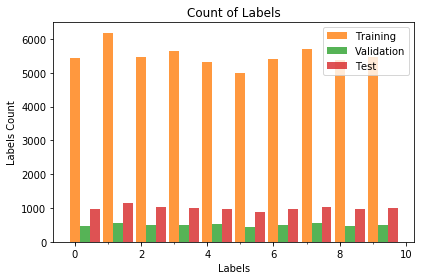

In [6]:
data_names = ["Training", "Validation", "Test"]
vs.plot_labels_count([train_labels, valid_labels, test_labels], data_names , labels_index = 10, w_dir = w_dir)

From the above figure it is evident that the different class labels are even in all the different datasets.  

### Visualize the Images
Random images from each class is displayed to visualize the handwritten digits and their labels.

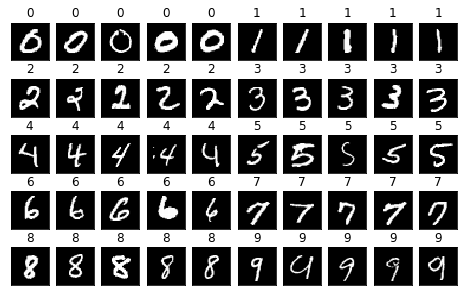

In [7]:
# Visualize Samples from each class randomly
vs.visualize_mnist(train_images, train_labels, w_dir = w_dir)

## Normalize
The MNIST dataset from Tensorflow Tuturial is normalized in the range of 0 to 1, inclusive. But for the project the dataset is normalized in the range -1.0 to 1.0, inclusive. 

In [8]:
print("Min: {}".format(np.min(train_images[1])))
print("Max: {}".format(np.max(train_images[1])))

Min: -1.0
Max: 1.0


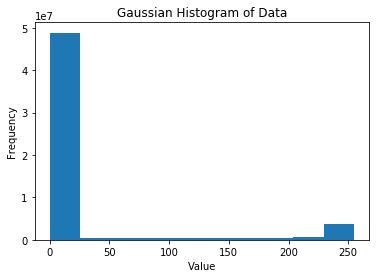

In [9]:
plot_data = np.reshape(train_images, -1)
vs.plot_histogram(plot_data, w_dir)

From the above figure it is apparent that most of the values in the dataset are zeros, with less than one-tenth of non-zero values. 

## Benchmark Model

<img src="files/images/deepnet.png" title="CNN Model for MNIST">
The structure of the Benchmark Model is shown above in the figure. This has already been trained using the MNIST training dataset. The training loss and accuracy and validation loss and accuracy can be visualized by the plot below:

### Training and Validation Curves

Plotting for Model Accuracy
Plotting for Model Loss


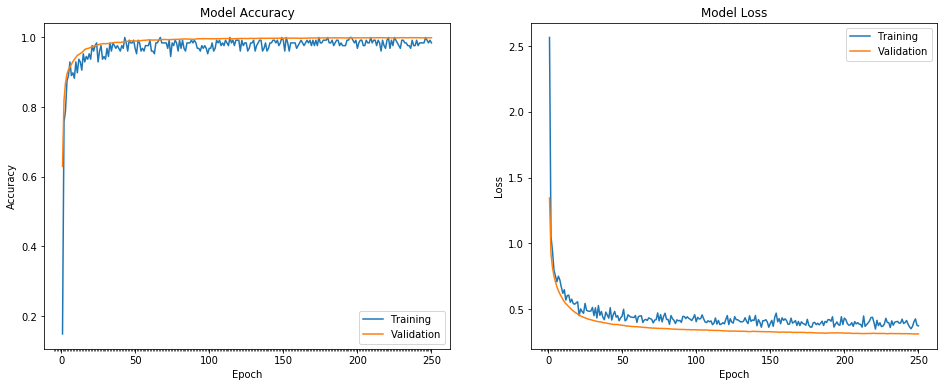

In [10]:
# Visualization of the MNIST Training and Validation
vs.plot_mnist_train(mnist_dir, w_dir)

## Testing the Benchmark Model Against MNIST Test Dataset
The model has already been trained with the accuracy as given above. Here, the model will be tested against MNIST test dataset to determine its accuracy.

In [11]:
# Model is restored and tested against MNIST test dataset
deepnet = helper.restore_mnist(input_data = input_data, r_dir = mnist_dir)

Restoring Model from : /mnist/mnist_model.ckpt
Model restored.


Testing Accuracy: 98.69001507759094



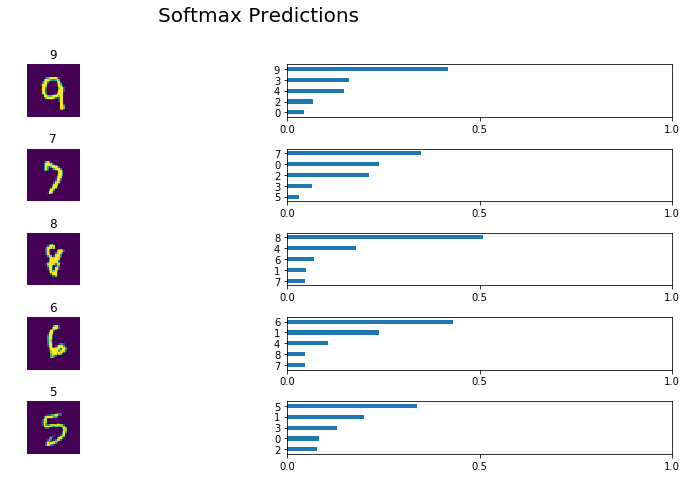

In [12]:
rimages, rlabels, top_p, accuracy = helper.test_mnist(model = deepnet, top_n = 5, r_dir = mnist_dir)
print('Testing Accuracy: {}\n'.format(accuracy * 100.0))
vs.display_predictions(rimages, rlabels, top_p, 5, w_dir)

## GAN Architecture of the Adversarial Training Model

The structure of **Wasserstein GAN Model**
<img src="files/images/gan.png" title="CNN Model for MNIST">


### Discriminator Model

The architecture of the **Discriminator Model** also known as **Critic** in case of **Wasserstein GAN** is provided below:
<img src="files/images/discriminator.png" title="Wasserstein GAN Discriminator">

### Generator Model

The architecture of the **Generator Model** in case of **Wasserstein GAN** is provided below:
<img src="files/images/generator.png" title="Wasserstein GAN Generator">

The actual GAN architeture used to train the Classifier to be robust to Adversarial Training is given below:

## Visualization of Training of GAN and Robust Classifier

Plotting for Classifier
Plotting for Classifier Fake
Plotting for Discriminator
Plotting for Generator


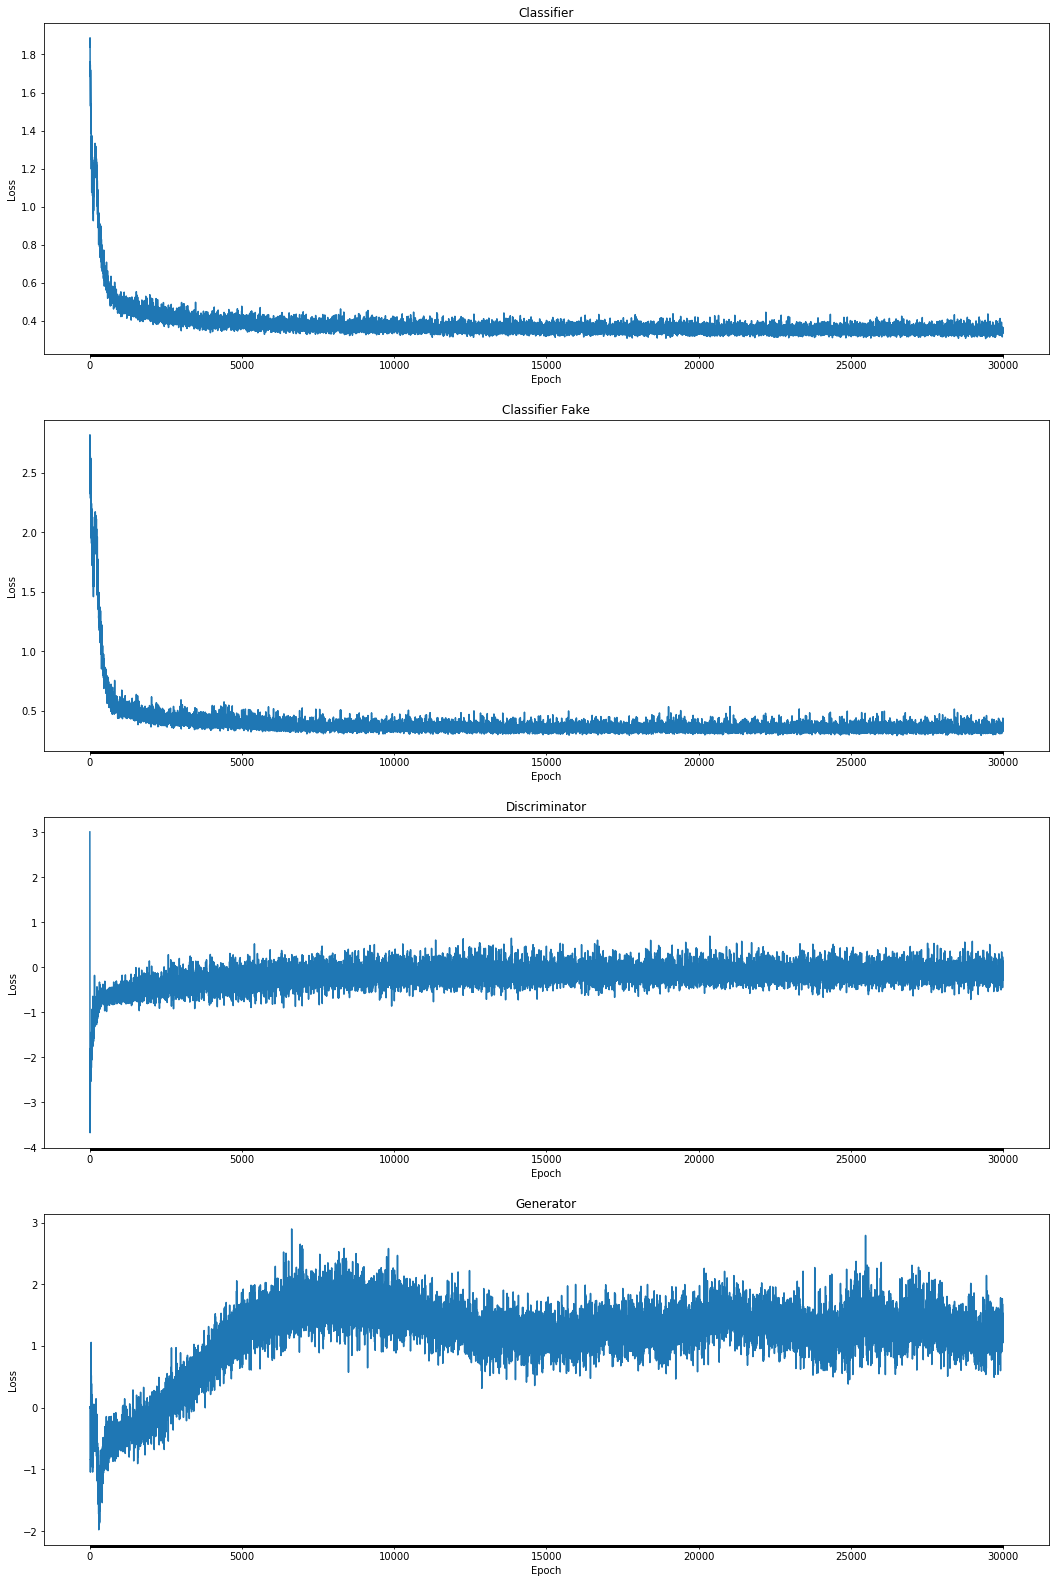

In [13]:
# Visualization of the GAN Training and Validation
vs.plot_wgan_train(wgan_dir, w_dir)

## Testing the Robust Classifier Against MNIST Test Dataset
The model has already been trained with the accuracy as given above. Here, the model will be tested against MNIST test dataset to determine its accuracy.

In [14]:
# Model is restored
wgan = helper.restore_wgan(input_data = input_data, r_dir = wgan_dir)

Restoring Model from : /wgan/wgan_model.ckpt-29999
Model restored.


Testing Accuracy: 99.16999936103821



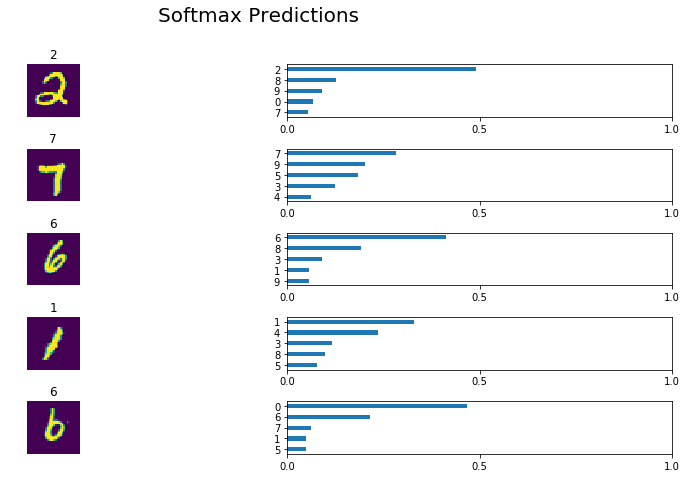

In [15]:
# Model tested against MNIST test dataset
rimages, rlabels, top_p, accuracy = helper.test_wgan(model = wgan, top_n = 5, r_dir = wgan_dir)
print('Testing Accuracy: {}\n'.format(accuracy * 100.0))
vs.display_predictions(rimages, rlabels, top_p, 5, w_dir)

## Generated Images from WGAN

### 1000th

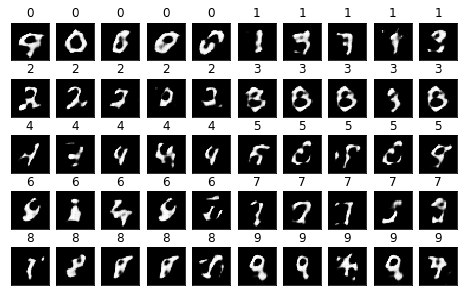

In [16]:
# Image generated in the first 1000 epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 2000th

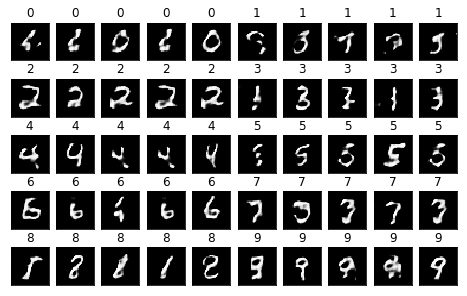

In [17]:
# Image generated in the 10000th epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-1999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 3000th

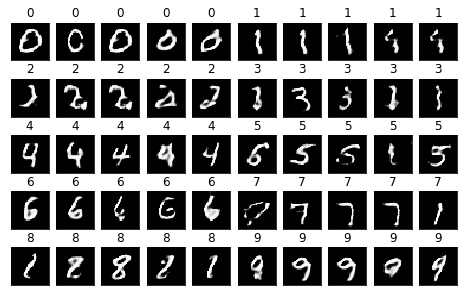

In [18]:
# Image generated in the 10000th epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-2999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 5000th

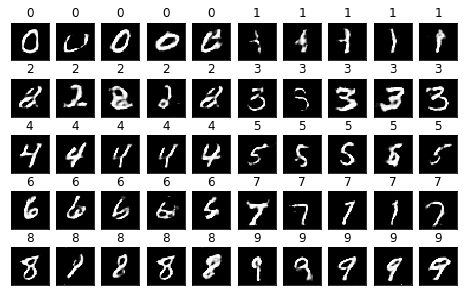

In [19]:
# Image generated in the 10000th epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-4999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 10000th

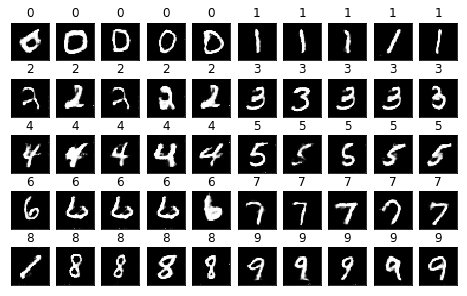

In [20]:
# Image generated in the 10000th epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-9999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 15000th

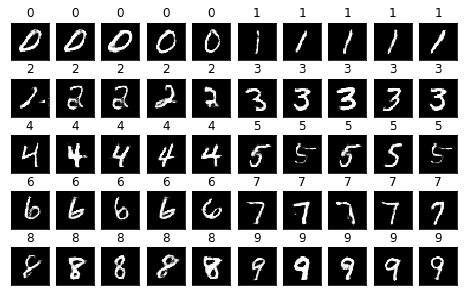

In [21]:
# Image generated in the 15000th epoch
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-14999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### 25000th

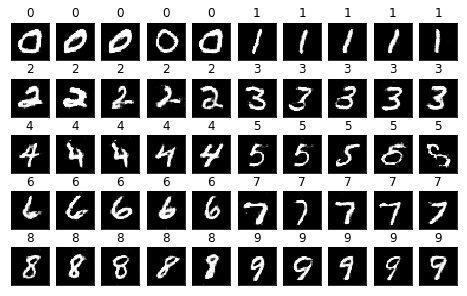

In [22]:
# Image generated in the end
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-24999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

### End = 30000th

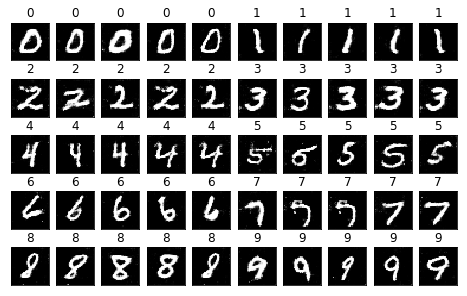

In [23]:
# Image generated in the end
gen_images, gen_labels, gen_glabels = input_data.generated(wgan_dir, filename = "gen_img-29999.p")
vs.visualize_mnist(gen_images, gen_glabels, w_dir = w_dir)

The above plot illustrate the different stages of the Generators training and the developement of it towards a model fully capable of generating near to original images. The grid of images of the last training epoch discriminated as real or fake.

## Testing Robust Classifier Against Samples Generated by GAN in different Epochs

### Testing Benchmark Model

In [24]:
accuracy_epochs = helper.test_gen_mnist(model = deepnet, top_n = 5, r_dir = mnist_dir, p_dir = wgan_dir, epochs = 30000)

Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated


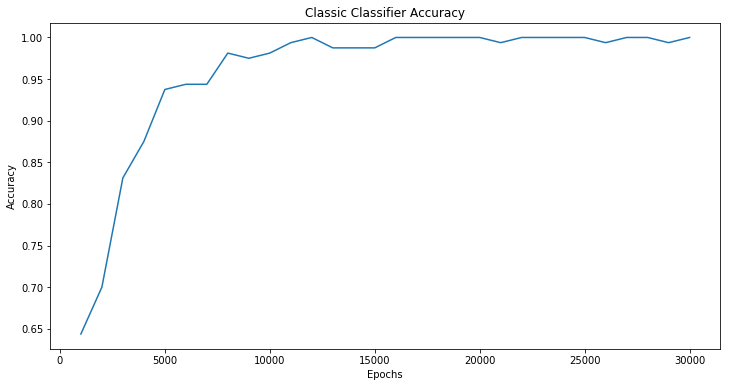

In [25]:
vs.test_generated(accuracy_epochs, "Classic Classifier Accuracy", w_dir)

In [26]:
display(accuracy_epochs)

{999: 0.64374995,
 1999: 0.70000005,
 2999: 0.83125007,
 3999: 0.875,
 4999: 0.9375,
 5999: 0.94374996,
 6999: 0.94374996,
 7999: 0.98124999,
 8999: 0.97500002,
 9999: 0.98124993,
 10999: 0.99374998,
 11999: 1.0,
 12999: 0.98750001,
 13999: 0.98750007,
 14999: 0.98750001,
 15999: 1.0,
 16999: 1.0,
 17999: 1.0,
 18999: 1.0,
 19999: 1.0,
 20999: 0.99375004,
 21999: 1.0,
 22999: 1.0,
 23999: 1.0,
 24999: 1.0,
 25999: 0.99374998,
 26999: 1.0,
 27999: 1.0,
 28999: 0.99375004,
 29999: 1.0}

### Testing Robust Classifier

The robust classifier is testing against the generated images at different stages of training.

In [27]:
accuracy_epochs_wgan = helper.test_gen_wgan(model = wgan, top_n = 5, r_dir = wgan_dir, p_dir = wgan_dir, epochs = 30000)

Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated
Testing the Generated


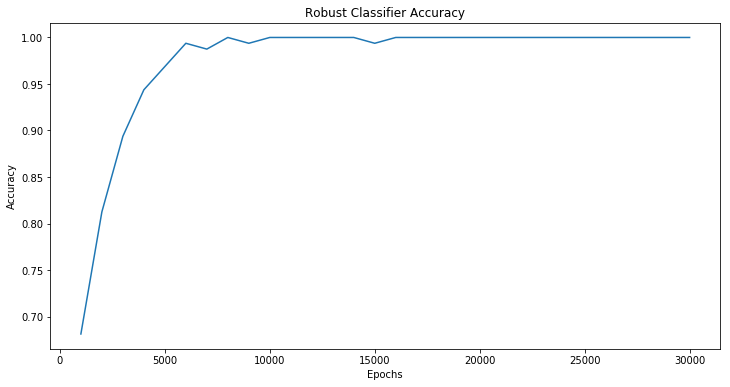

In [28]:
vs.test_generated(accuracy_epochs_wgan, "Robust Classifier Accuracy", w_dir)

In [29]:
display(accuracy_epochs_wgan)

{999: 0.68124998,
 1999: 0.8125,
 2999: 0.89375001,
 3999: 0.94375002,
 4999: 0.96875,
 5999: 0.99374998,
 6999: 0.98750001,
 7999: 1.0,
 8999: 0.99374998,
 9999: 1.0,
 10999: 1.0,
 11999: 1.0,
 12999: 1.0,
 13999: 1.0,
 14999: 0.99374998,
 15999: 1.0,
 16999: 1.0,
 17999: 1.0,
 18999: 1.0,
 19999: 1.0,
 20999: 1.0,
 21999: 1.0,
 22999: 1.0,
 23999: 1.0,
 24999: 1.0,
 25999: 1.0,
 26999: 1.0,
 27999: 1.0,
 28999: 1.0,
 29999: 1.0}

## Conclusion